## Import libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Show the first 5 rows of the data

In [14]:
def show_data(dataframe, n=5):
    """Show the first n rows of the dataframe

    This function is used to show the first n rows of the dataframe.
    Default value of n is 5.
    """
    print(dataframe.head(n))


## Explore the dataset

In [35]:
def explore_dataset(dataframe):
    """Explore the dataset

    This function is used to explore the dataset. It shows basic statistics
    and a pairplot for visual exploration.

    A pairplot is a plot where each row and column of the dataset is plotted against each other.
    This means that there are n^2 plots for a dataset with n features (columns).
    """
    # Basic statistics
    print("Basic Statistics:")
    print(dataframe.describe())

## Show the info of the dataframe

In [16]:
def show_data_info(dataframe):
    """Show the info of the dataframe

    This function is used to show the info of the dataframe. It shows the number of rows, columns, column names, column types, number of non-null values and memory usage.
    It also shows the number of unique values, number of missing values, number of zero values, number of positive values and number of negative values for each column.
    """
    print(dataframe.info())

## Show the details of each column

In [17]:
def show_column_details(dataframe):
    """Show the details of each column

    This function is used to show the details of each column. It shows the column name, column type, number of unique values, unique values, number of missing values, number of zero values, number of positive values and number of negative values for each column.

    If the column type is object, it shows the number of empty strings instead of number of positive and negative values.

    If the number of unique values is less than 10, it shows the unique values.
    """
    columns = dataframe.columns
    print("Column details:")
    print(f"Number of columns: {len(columns)}")
    print()
    for column in columns:
        # Show column name
        print(f"Column name: {column}")

        # Show column type, types are int64, float64, object, bool, datetime64, timedelta[ns]
        print(f"Column type: {dataframe[column].dtype}")

        # Show number of unique values
        print(f"Number of unique values: {dataframe[column].nunique()}")

        # Show unique values if number of unique values is less than 10
        if len(dataframe[column].unique()) < 10:
            print(f"Unique values: {dataframe[column].unique()}")

        # Show number of missing values
        print(f"Number of missing values: {dataframe[column].isnull().sum()}")

        #  if column type is object, show number of empty strings
        if dataframe[column].dtype == "object":
            print(
                f"Number of empty strings: {len(dataframe[dataframe[column] == ''])}")
        # otherwise, show number of zero values, number of positive values and number of negative values
        else:
            # Show number of zero values
            print(
                f"Number of zero values: {len(dataframe[dataframe[column] == 0])}")

            # Show number of positive values
            print(
                f"Number of positive values: {len(dataframe[dataframe[column] > 0])}")

            # Show number of negative values
            print(
                f"Number of negative values: {len(dataframe[dataframe[column] < 0])}")
        print()

## Drop missing values

In [18]:
def drop_missing_values(dataframe):
    """Drop missing values

    This function is used to drop missing values from the dataframe. It drops all rows with missing values.

    Dropping missing values means removing rows with missing values.

    It does not modify the original dataframe. It returns a new dataframe with missing values dropped.
    """
    return dataframe.dropna()

## Drop columns

In [19]:
def drop_columns(dataframe, columns):
    """Drop columns
    
    This function is used to drop columns from the dataframe. It drops the specified columns.

    Dropping columns means removing columns from the dataframe.
    """
    return dataframe.drop(columns, axis=1)  # axis=1 means columns, axis=0 means rows

## Fill missing values

In [140]:
def fill_missing_values(dataframe, column, strategy="mean"):
    """Fill missing values

    This function is used to fill missing values in the dataframe. It fills missing values with the mean, median, mode or 0. The default strategy is mean. Other strategies are median, mode and 0.

    Filling missing values with mean, median or mode is only possible for numeric columns. Filling missing values with 0 is possible for all columns.

    Filling missing values means replacing missing values with other values. It is also known as imputation.

    It does not modify the original dataframe. It returns a new dataframe with missing values filled.
    """

    if strategy == "mean":
        dataframe[column] = dataframe[column].fillna(dataframe[column].mean())
    elif strategy == "median":
        dataframe[column] = dataframe[column].fillna(
            dataframe[column].median())
    elif strategy == "mode":
        dataframe[column] = dataframe[column].fillna(dataframe[column].mode())
    elif strategy == "filna":
        dataframe[column] = dataframe[column].fillna(0)
    else:
        raise ValueError("Invalid strategy")

## Merge two dataframes

In [21]:
def merge_dataframes(df1, df2, on_column):
    """Merge two dataframes

    This function is used to merge two dataframes. It merges two dataframes on a column.

    Merging two dataframes means combining two dataframes into one dataframe.

    Here is an example of how to use this function:

    Original dataframe 1:
        ID  Score
    0   1     70
    1   2     80
    2   3     90
    
    Original dataframe 2:
        ID Grade
    0   2     B
    1   3     A
    2   4     C
    
    Merged dataframe on ID:
        ID  Score Grade
    0   2     80     B
    1   3     90     A

    In this case the merged dataframe has 2 rows and 3 columns. Only the common rows are kept. The rows with ID 1 and 4 are dropped. And all columns from both dataframes are kept. The rows are sorted by ID.
    """
    return pd.merge(df1, df2, on=on_column)

## Join two dataframes

In [22]:
def join_dataframes(df1, df2, on_column):
    """Join two dataframes

    This function is used to join two dataframes. It joins two dataframes on a column.

    Joining two dataframes means combining two dataframes into one dataframe.


    Here is an example of how to use this function:

    Original dataframe 1:
        ID  Score
    0   1     70
    1   2     80
    2   3     90
    
    Original dataframe 2:
        ID Grade
    0   2     B
    1   3     A
    2   4     C
    
    Case 1:
    Joined dataframe 1 on dataframe 2 using ID:
    ID  Score Grade
    1      70   NaN
    2      80     B
    3      90     A

    Case 2:
    Joined dataframe 2 on dataframe 1 using ID:
    ID  Score Grade
    2      80     B
    3      90     A
    4     NaN     C

    In the first case, dataframe 1 is joined on dataframe 2, so all rows from dataframe 1 are kept.
    
    In the second case, dataframe 2 is joined on dataframe 1, so all rows from dataframe 2 are kept.
    
    In both cases, the rows are sorted by ID.
    """
    return df1.join(df2.set_index(on_column), on=on_column)

## Concatenate two dataframes

In [23]:
def concatenate_dataframes(df1, df2):
    """Concatenate two dataframes
    
    This function is used to concatenate two dataframes. It concatenates two dataframes on the columns.

    Concatenating two dataframes means combining two dataframes into one dataframe.

    Here is an example of how to use this function:

    Original dataframe 1:
        ID  Score
    0   1     70
    1   2     80
    2   3     90
    
    Original dataframe 2:
        ID Grade
    0   2     B
    1   3     A
    2   4     C

    Concatenated dataframe:
        ID  Score  ID Grade
    0   1     70   2     B
    1   2     80   3     A
    2   3     90   4     C

    In this case the concatenated dataframe has 3 rows and 4 columns. All rows from both dataframes are kept. And all columns from both dataframes are kept.
    """
    return pd.concat([df1, df2], axis=1)

## Show scatter plot

In [24]:
def show_scatter_plot(dataframe, x, y):
    """Show scatter plot
    
    This function is used to show a scatter plot. It shows a scatter plot of the specified columns.

    A scatter plot is a plot where each point represents a row in the dataframe. The x-axis represents the values of the first column and the y-axis represents the values of the second column.
    """
    plt.scatter(dataframe[x], dataframe[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

## Show bar plot

In [92]:
def show_bar_plot(dataframe, x, y):
    """Show bar plot

    This function is used to show a bar plot. It shows a bar plot of the specified columns.

    A bar plot is a plot where each bar represents a row in the dataframe. The x-axis represents the values of the first column and the y-axis represents the values of the second column.
    """
    plt.bar(
        dataframe[x],
        dataframe[y],
        color="green",
        width=0.5,
    )
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

## Show histogram

In [131]:
def show_histogram(dataframe, column):
    """Show histogram

    This function is used to show a histogram. It shows a histogram of the specified column.

    A histogram is a plot where each bar represents a range of values. The x-axis represents the range of values and the y-axis represents the frequency of values in that range.
    """

    plt.hist(
        dataframe[column],
        bins=20,
        rwidth=0.9,
        color='blue',
        alpha=0.5,
        edgecolor='black',
        linewidth=1.2,
    )
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## Show box plot

In [108]:
def show_box_plot(dataframe, x, y):
    """Show box plot

    This function is used to show a box plot. It shows a box plot of the specified columns.

    A box plot is a plot where each box represents a range of values. The x-axis represents the range of values and the y-axis represents the frequency of values in that range.
    """
    sns.boxplot(
        x=x,
        y=y,
        data=dataframe,
        palette="Set3",
        linewidth=1,
        width=0.5,
        showmeans=True,
        meanprops={
            "marker": "x",
            "markerfacecolor": "white",
            "markeredgecolor": "black",
            "markersize": "5",
        },
        showfliers=False,
    )
    plt.show()

## Show heatmap

In [28]:
def show_heatmap(dataframe):
    """Show heatmap
    
    This function is used to show a heatmap. It shows a heatmap of the correlation between columns.

    A heatmap is a plot where each cell represents the correlation between two columns. The x-axis represents the first column and the y-axis represents the second column.
    """
    sns.heatmap(dataframe.corr(), annot=True)
    plt.show()

## Read dataset

In [49]:
df1 = pd.read_csv('Australia.csv')
df2 = pd.read_csv('National.csv')

## Show dataset

In [50]:
show_data(df1)

         Date Hospital   ICU  \
0       21/04    3,320   146   
1  22/04/2022    3,236   134   
2  23/04/2022    3,210   133   
3  24/04/2022    3,152   135   
4  25/04/2022    3,189   132   

   Hospitalisations exc. QLD / NT incidental admissions  
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     


In [51]:
show_data(df2)

         Date  AUS
0  23/12/2021  6.5
1  24/12/2021  7.0
2  25/12/2021  6.3
3  26/12/2021  6.1
4  27/12/2021  6.5


In [52]:
show_data_info(df1)
print()
print()
show_data_info(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 4 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Date                                                  471 non-null    object 
 1   Hospital                                              471 non-null    object 
 2    ICU                                                  471 non-null    int64  
 3   Hospitalisations exc. QLD / NT incidental admissions  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 14.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    590 non-null    object 
 1   AUS     589 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB
None


### The first dataframe has a column named ICU. The column name has a space at the beginning. We will remove the space.

In [53]:
# remove space from column names
df1.columns = df1.columns.str.strip()  # remove space from start and end of column names
df2.columns = df2.columns.str.strip()  # remove space from start and end of column names


In [54]:
show_data_info(df1)
print()
print()
show_data_info(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 4 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Date                                                  471 non-null    object 
 1   Hospital                                              471 non-null    object 
 2   ICU                                                   471 non-null    int64  
 3   Hospitalisations exc. QLD / NT incidental admissions  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 14.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    590 non-null    object 
 1   AUS     589 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB
None


In [48]:
show_data_info(df1)
print()
print()
show_data_info(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 4 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Date                                                  471 non-null    object 
 1   Hospital                                              471 non-null    int64  
 2   ICU                                                   471 non-null    int64  
 3   Hospitalisations exc. QLD / NT incidental admissions  0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 14.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    590 non-null    object 
 1   AUS     589 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB
None


In [56]:
show_data(df1)
print()
print()
show_data(df2)

         Date Hospital  ICU  \
0       21/04    3,320  146   
1  22/04/2022    3,236  134   
2  23/04/2022    3,210  133   
3  24/04/2022    3,152  135   
4  25/04/2022    3,189  132   

   Hospitalisations exc. QLD / NT incidental admissions  
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     


         Date  AUS
0  23/12/2021  6.5
1  24/12/2021  7.0
2  25/12/2021  6.3
3  26/12/2021  6.1
4  27/12/2021  6.5


### The first dataframe has a column named Hospital, which contains numeric values but because of the comma in the numbers it is considered as a string. We need to remove the comma and convert the column to numeric.

In [57]:
# remove comma from numbers
df1['Hospital'] = df1['Hospital'].str.replace(',', '')

# convert to numeric
df1['Hospital'] = pd.to_numeric(df1['Hospital'])
print(df1)

           Date  Hospital  ICU  \
0         21/04      3320  146   
1    22/04/2022      3236  134   
2    23/04/2022      3210  133   
3    24/04/2022      3152  135   
4    25/04/2022      3189  132   
..          ...       ...  ...   
466  31/07/2023      1283   24   
467  01/08/2023      1283   24   
468  02/08/2023      1283   24   
469  03/08/2023      1283   24   
470  04/08/2023      1097   31   

     Hospitalisations exc. QLD / NT incidental admissions  
0                                                  NaN     
1                                                  NaN     
2                                                  NaN     
3                                                  NaN     
4                                                  NaN     
..                                                 ...     
466                                                NaN     
467                                                NaN     
468                                                

In [121]:
explore_dataset(df1)
print()
print()
explore_dataset(df2)

Basic Statistics:
          Hospital         ICU
count   471.000000  471.000000
mean   2469.178344   76.154989
std     984.107170   38.331857
min    1097.000000   24.000000
25%    1563.000000   43.000000
50%    2337.000000   63.000000
75%    3039.500000  101.500000
max    5571.000000  184.000000


Basic Statistics:
              AUS
count  589.000000
mean    33.572156
std     18.371427
min      6.100000
25%     17.900000
50%     28.600000
75%     44.600000
max     84.400000


In [60]:
show_column_details(df1)

Column details:
Number of columns: 4

Column name: Date
Column type: object
Number of unique values: 471
Number of missing values: 0
Number of empty strings: 0

Column name: Hospital
Column type: int64
Number of unique values: 195
Number of missing values: 0
Number of zero values: 0
Number of positive values: 471
Number of negative values: 0

Column name: ICU
Column type: int64
Number of unique values: 104
Number of missing values: 0
Number of zero values: 0
Number of positive values: 471
Number of negative values: 0

Column name: Hospitalisations exc. QLD / NT incidental admissions
Column type: float64
Number of unique values: 0
Unique values: [nan]
Number of missing values: 471
Number of zero values: 0
Number of positive values: 0
Number of negative values: 0



In [119]:
show_column_details(df2)

Column details:
Number of columns: 2

Column name: Date
Column type: object
Number of unique values: 590
Number of missing values: 0
Number of empty strings: 0

Column name: AUS
Column type: float64
Number of unique values: 261
Number of missing values: 1
Number of zero values: 0
Number of positive values: 589
Number of negative values: 0



### In the first dataframe, the column named "Hospitalisations exc. QLD / NT incidental admissions" has no values. We will drop this column.

In [63]:
df1 = drop_columns(
    df1,  # dataframe to drop columns from
	['Hospitalisations exc. QLD / NT incidental admissions'],  # columns to drop
)
print(df1)

           Date  Hospital  ICU
0         21/04      3320  146
1    22/04/2022      3236  134
2    23/04/2022      3210  133
3    24/04/2022      3152  135
4    25/04/2022      3189  132
..          ...       ...  ...
466  31/07/2023      1283   24
467  01/08/2023      1283   24
468  02/08/2023      1283   24
469  03/08/2023      1283   24
470  04/08/2023      1097   31

[471 rows x 3 columns]


## Show histogram of the first dataframe

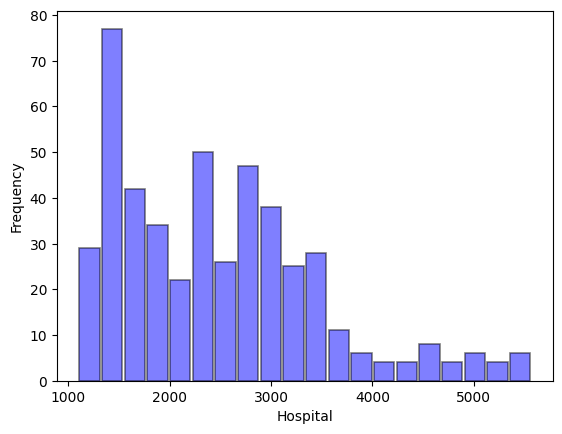

In [79]:
show_histogram(df1, 'Hospital')

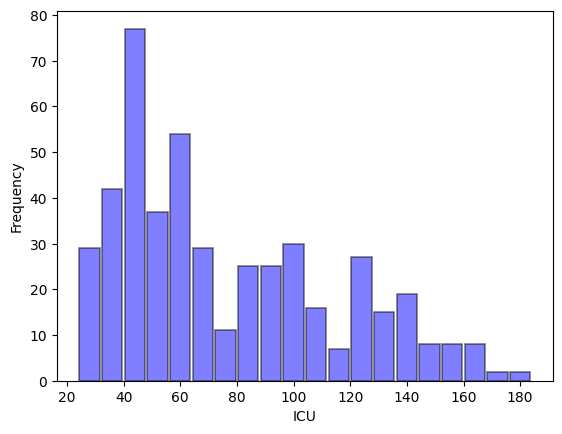

In [80]:
show_histogram(df1, 'ICU')

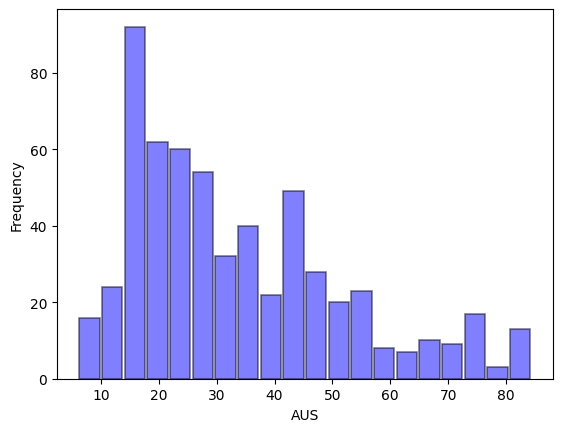

In [125]:
show_histogram(df2, 'AUS')

## Show bar plots

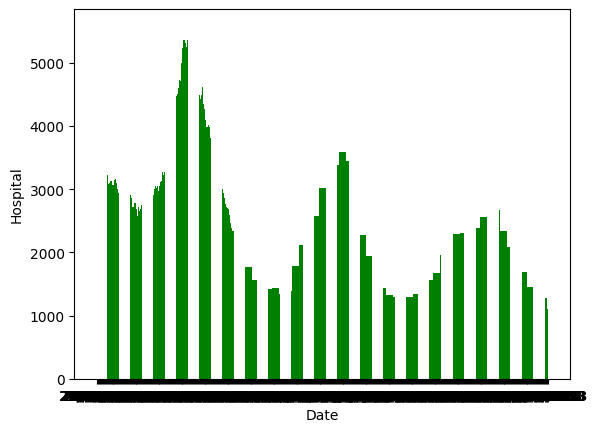

In [94]:
show_bar_plot(df1, 'Date', 'Hospital')

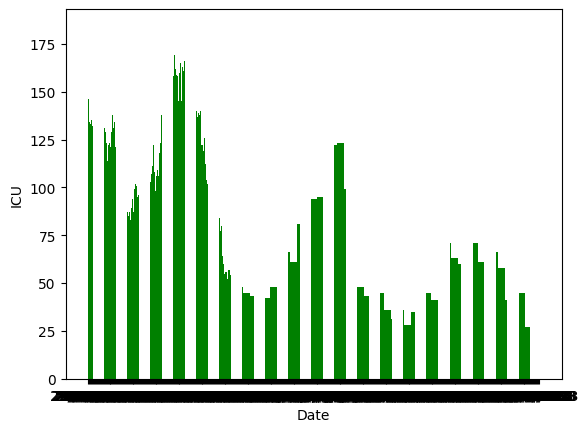

In [93]:
show_bar_plot(df1, 'Date', 'ICU')

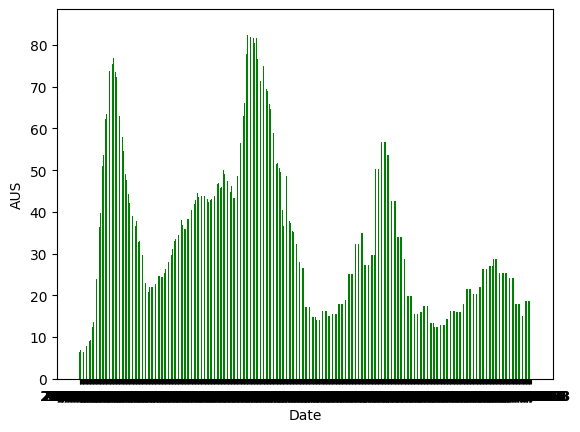

In [132]:
show_bar_plot(df2, 'Date', 'AUS')

## Find the max value of ICU and Hospital

In [95]:
icu_max = df1['ICU'].max()
icu_max_date = df1[df1['ICU'] == icu_max]['Date'].values[0]

icu_min = df1['ICU'].min()
icu_min_date = df1[df1['ICU'] == icu_min]['Date'].values[0]

hospital_max = df1['Hospital'].max()
hospital_max_date = df1[df1['Hospital'] == hospital_max]['Date'].values[0]

hospital_min = df1['Hospital'].min()
hospital_min_date = df1[df1['Hospital'] == hospital_min]['Date'].values[0]

print(f"Highest ICU count: {icu_max} on date {icu_max_date}")
print(f"Lowest ICU count: {icu_min} on date {icu_min_date}")

print(f"Highest hospital count: {hospital_max} on date {hospital_max_date}")
print(f"Lowest hospital count: {hospital_min} on date {hospital_min_date}")


Highest ICU count: 184 on date 02/08/2022
Lowest ICU count: 24 on date 28/07/2023
Highest hospital count: 5571 on date 26/07/2022
Lowest hospital count: 1097 on date 04/08/2023


## Find the max value of AUS

In [133]:
death_max = df2['AUS'].max()
death_max_date = df2[df2['AUS'] == death_max]['Date'].values[0]

death_min = df2['AUS'].min()
death_min_date = df2[df2['AUS'] == death_min]['Date'].values[0]

print(f"Highest AUS count: {death_max} on date {death_max_date}")
print(f"Lowest AUS count: {death_min} on date {death_min_date}")

Highest AUS count: 84.4 on date 10/08/2022
Lowest AUS count: 6.1 on date 26/12/2021


### These values are outliers. Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. Outliers can cause serious problems in statistical analyses.

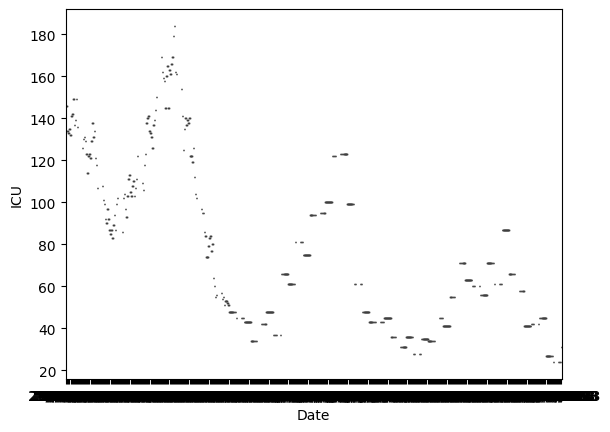

In [96]:
show_box_plot(df1, 'Date', 'ICU')

/var/folders/m6/nn61ncb91jj37ynbrr35j3mw0000gn/T/ipykernel_2072/2717049395.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


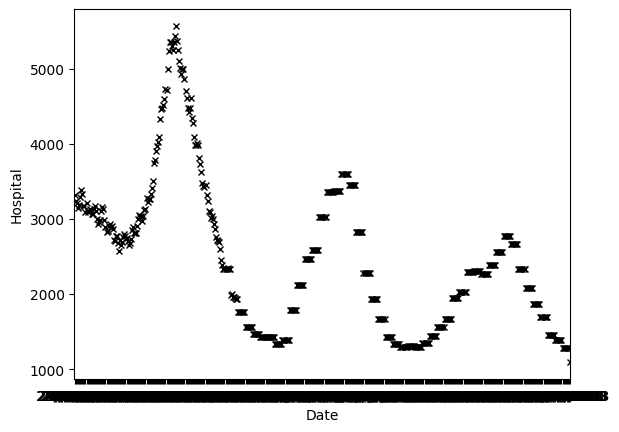

In [109]:
show_box_plot(df1, 'Date', 'Hospital')

/var/folders/m6/nn61ncb91jj37ynbrr35j3mw0000gn/T/ipykernel_2072/2717049395.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


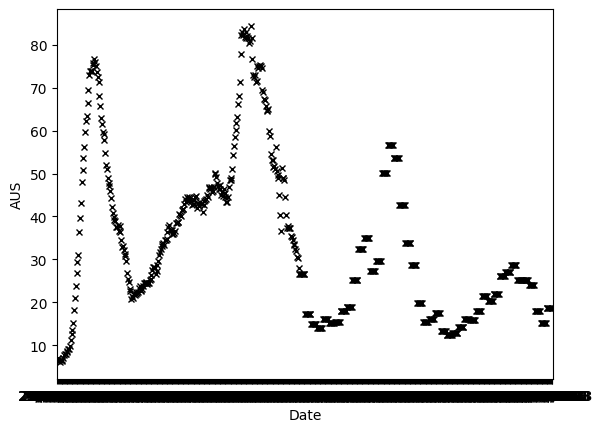

In [134]:
show_box_plot(df2, 'Date', 'AUS')

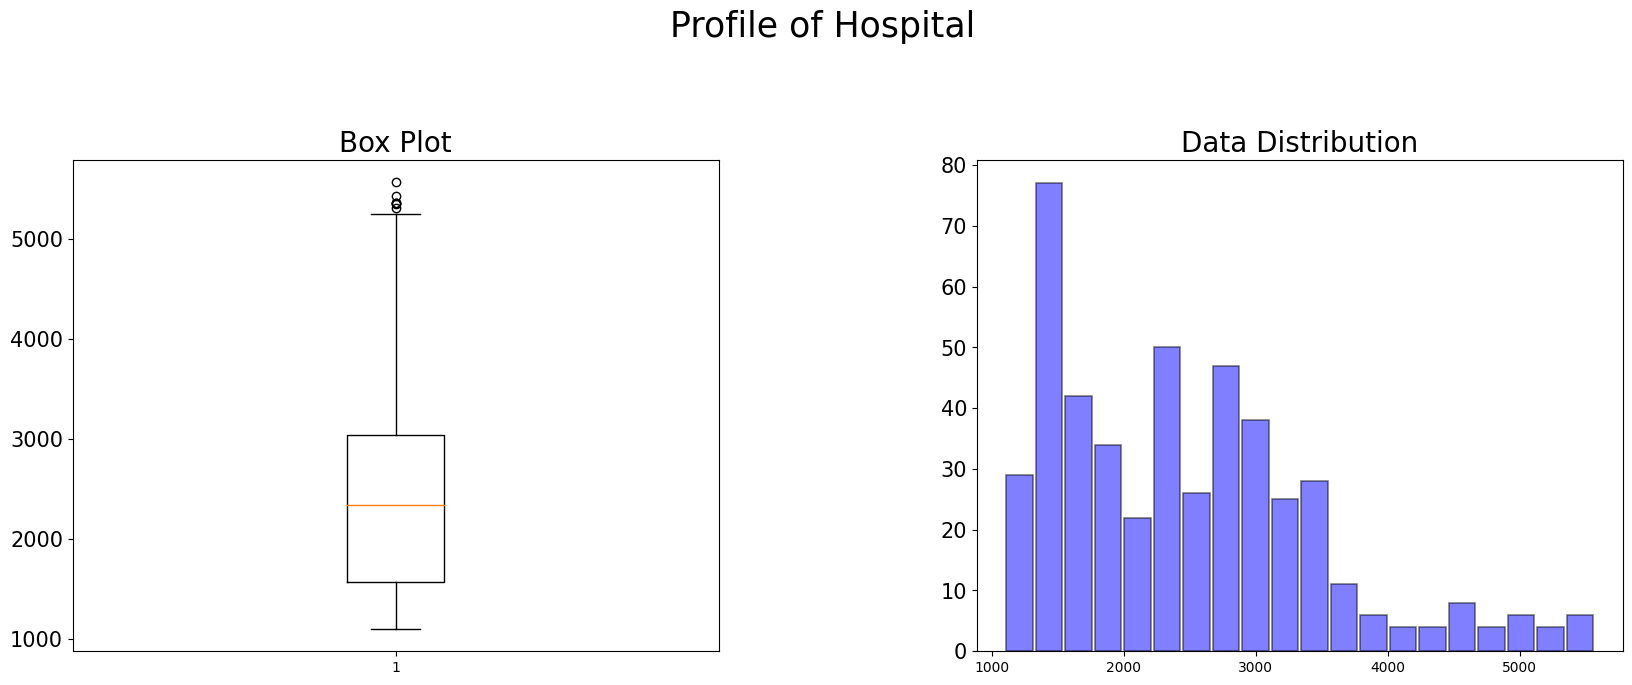

Skewness of Hospital is 0.9052312017918882
The data is positively skewed
Positive skewness means that the data is concentrated on the left side of the graph

Kurtosis of Hospital is 0.5091911335950856
The data is light-tailed
Light-tailed means that the data has no outliers


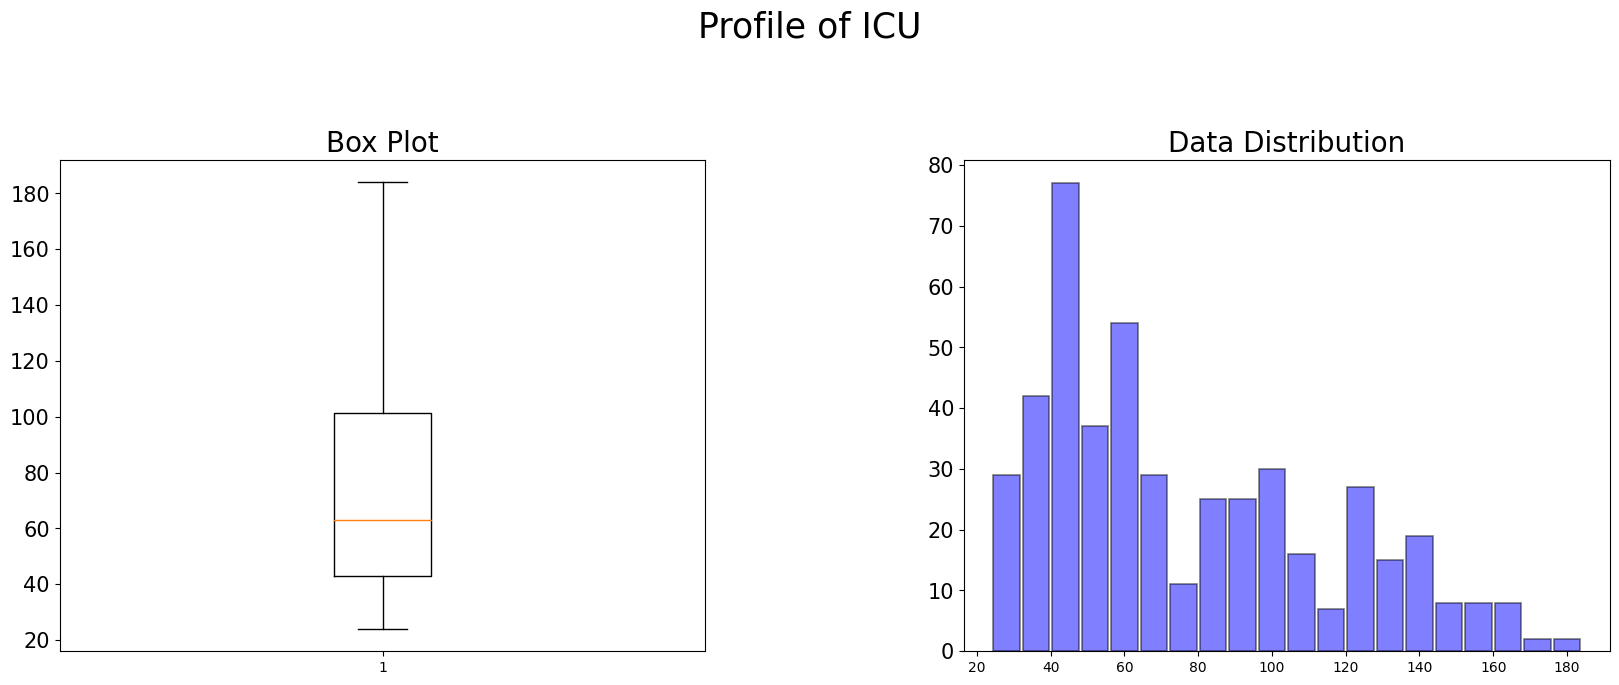

Skewness of ICU is 0.6814906829023984
The data is positively skewed
Positive skewness means that the data is concentrated on the left side of the graph

Kurtosis of ICU is -0.6167067641951514
The data is light-tailed
Light-tailed means that the data has no outliers


In [124]:
numerical_columns = [
    column for column in df1.columns if df1[column].dtype != "object"]
for column in numerical_columns:

    # Plot the graphs
    fig3 = plt.figure(figsize=(20, 15))
    # Title for the whole figure
    fig3.suptitle("Profile of " + column, fontsize=25)
    plt.subplots_adjust(wspace=0.4, hspace=0.35)

    ax1 = fig3.add_subplot(2, 2, 1)
    ax1.set_title("Box Plot", fontsize=20)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=15)
    ax1.boxplot(df1[column])

    ax1 = fig3.add_subplot(2, 2, 2)
    ax1.set_title("Data Distribution", fontsize=20)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=15)
    ax1.hist(
        df1[column],
        bins=20,
        rwidth=0.9,
        color='blue',
        alpha=0.5,
        edgecolor='black',
        linewidth=1.2,
    )

    plt.subplots_adjust(wspace=0.4, hspace=0.35)
    plt.show()

    skewness = df1[column].skew()
    print("Skewness of " + column + " is " + str(skewness))

    if skewness > 0:
        print("The data is positively skewed")
        print("Positive skewness means that the data is concentrated on the left side of the graph")
    elif skewness < 0:
        print("The data is negatively skewed")
        print("Negative skewness means that the data is concentrated on the right side of the graph")
    else:
        print("The data is not skewed")

        print("The data is normally distributed")

    print()

    kurtosis = df1[column].kurtosis()
    print("Kurtosis of " + column + " is " + str(kurtosis))

    if kurtosis > 3:
        print("The data is heavy-tailed")
        print("Heavy-tailed means that the data has outliers")
    elif kurtosis < 3:
        print("The data is light-tailed")
        print("Light-tailed means that the data has no outliers")
    else:
        print("The data is normally distributed")

['AUS']


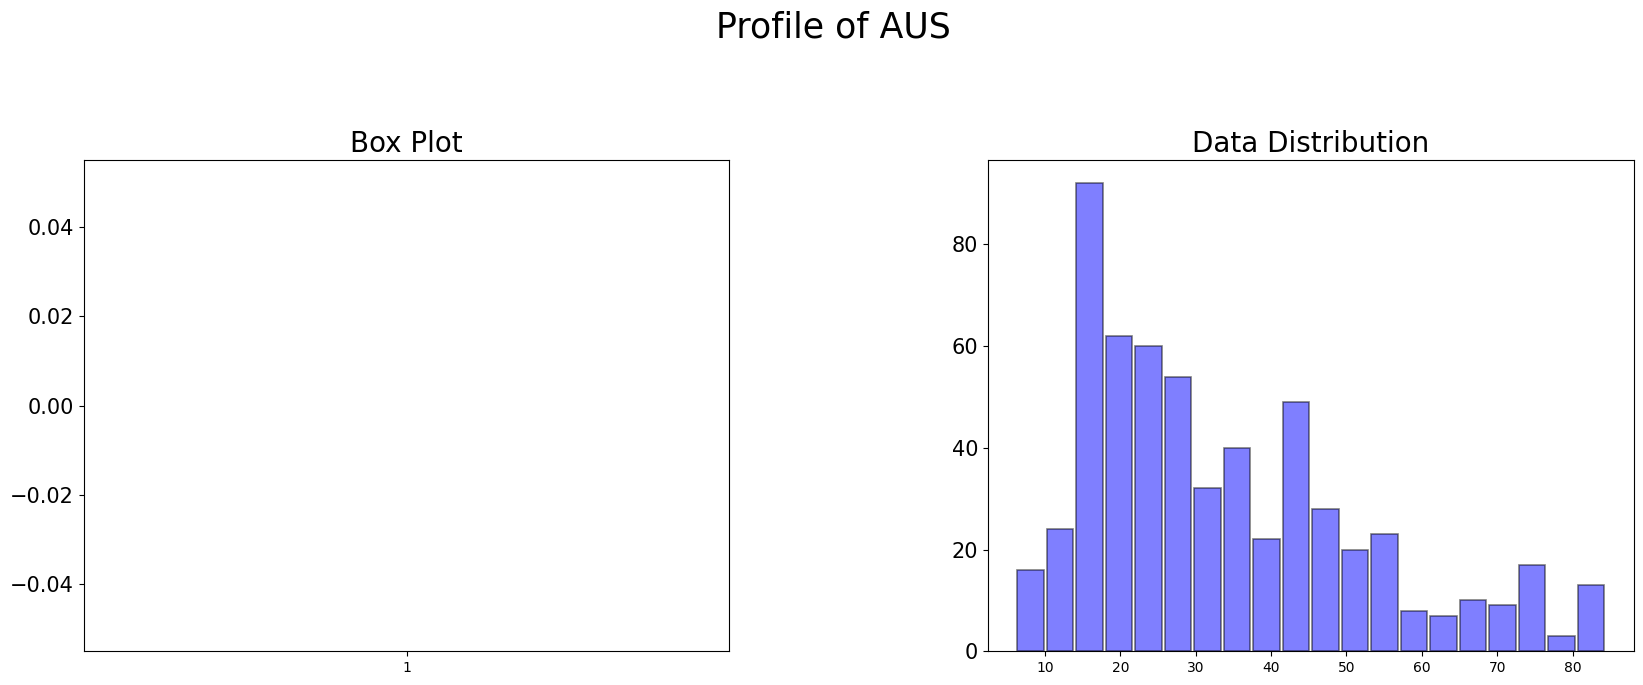

Skewness of AUS is 0.8852433510773143
The data is positively skewed
Positive skewness means that the data is concentrated on the left side of the graph

Kurtosis of AUS is 0.043367778063499784
The data is light-tailed
Light-tailed means that the data has no outliers


In [123]:
numerical_columns = [
    column for column in df2.columns if df2[column].dtype != "object"]
print(numerical_columns)

for column in numerical_columns:
    # Plot the graphs
    fig3 = plt.figure(figsize=(20, 15))
    # Title for the whole figure
    fig3.suptitle("Profile of " + column, fontsize=25)
    plt.subplots_adjust(wspace=0.4, hspace=0.35)

    ax1 = fig3.add_subplot(2, 2, 1)
    ax1.set_title("Box Plot", fontsize=20)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=15)
    ax1.boxplot(
        df2[column],
    )

    ax1 = fig3.add_subplot(2, 2, 2)
    ax1.set_title("Data Distribution", fontsize=20)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=15)
    ax1.hist(
        df2[column],
        bins=20,
        rwidth=0.9,
        color='blue',
        alpha=0.5,
        edgecolor='black',
        linewidth=1.2,
    )

    plt.subplots_adjust(wspace=0.4, hspace=0.35)
    plt.show()

    skewness = df2[column].skew()
    print("Skewness of " + column + " is " + str(skewness))

    if skewness > 0:
        print("The data is positively skewed")
        print("Positive skewness means that the data is concentrated on the left side of the graph")
    elif skewness < 0:
        print("The data is negatively skewed")
        print("Negative skewness means that the data is concentrated on the right side of the graph")
    else:
        print("The data is not skewed")

        print("The data is normally distributed")

    print()

    kurtosis = df2[column].kurtosis()
    print("Kurtosis of " + column + " is " + str(kurtosis))

    if kurtosis > 3:
        print("The data is heavy-tailed")
        print("Heavy-tailed means that the data has outliers")
    elif kurtosis < 3:
        print("The data is light-tailed")
        print("Light-tailed means that the data has no outliers")
    else:
        print("The data is normally distributed")

### These two csv files are not complete on their own. We need to merge them to get the complete data. We will merge them on the column named "Date".

## Show the first 5 rows of the merged dataframe

In [149]:
merged_df = merge_dataframes(df1, df2, 'Date')
print(merged_df)

           Date  Hospital  ICU   AUS
0    22/04/2022      3236  134  29.6
1    23/04/2022      3210  133  31.1
2    24/04/2022      3152  135  31.6
3    25/04/2022      3189  132  32.4
4    26/04/2022      3291  141  33.1
..          ...       ...  ...   ...
401  31/07/2023      1283   24  18.6
402  01/08/2023      1283   24  18.6
403  02/08/2023      1283   24  18.6
404  03/08/2023      1283   24  18.6
405  04/08/2023      1097   31   NaN

[406 rows x 4 columns]


In [150]:
show_data_info(merged_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      406 non-null    object 
 1   Hospital  406 non-null    int64  
 2   ICU       406 non-null    int64  
 3   AUS       405 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 12.8+ KB
None


In [151]:
columns = merged_df.columns
print(columns)

Index(['Date', 'Hospital', 'ICU', 'AUS'], dtype='object')


### AUS column should be named to Death

In [152]:
# change column name from AUS to Avg_Death
merged_df = merged_df.rename(columns={'AUS': 'Avg_Death'})
print(merged_df)

           Date  Hospital  ICU  Avg_Death
0    22/04/2022      3236  134       29.6
1    23/04/2022      3210  133       31.1
2    24/04/2022      3152  135       31.6
3    25/04/2022      3189  132       32.4
4    26/04/2022      3291  141       33.1
..          ...       ...  ...        ...
401  31/07/2023      1283   24       18.6
402  01/08/2023      1283   24       18.6
403  02/08/2023      1283   24       18.6
404  03/08/2023      1283   24       18.6
405  04/08/2023      1097   31        NaN

[406 rows x 4 columns]


In [153]:
show_column_details(merged_df)

Column details:
Number of columns: 4

Column name: Date
Column type: object
Number of unique values: 406
Number of missing values: 0
Number of empty strings: 0

Column name: Hospital
Column type: int64
Number of unique values: 186
Number of missing values: 0
Number of zero values: 0
Number of positive values: 406
Number of negative values: 0

Column name: ICU
Column type: int64
Number of unique values: 102
Number of missing values: 0
Number of zero values: 0
Number of positive values: 406
Number of negative values: 0

Column name: Avg_Death
Column type: float64
Number of unique values: 162
Number of missing values: 1
Number of zero values: 0
Number of positive values: 405
Number of negative values: 0



In [154]:
# drop the missing values
merged_df = drop_missing_values(merged_df)
print(merged_df)

           Date  Hospital  ICU  Avg_Death
0    22/04/2022      3236  134       29.6
1    23/04/2022      3210  133       31.1
2    24/04/2022      3152  135       31.6
3    25/04/2022      3189  132       32.4
4    26/04/2022      3291  141       33.1
..          ...       ...  ...        ...
400  30/07/2023      1283   24       18.6
401  31/07/2023      1283   24       18.6
402  01/08/2023      1283   24       18.6
403  02/08/2023      1283   24       18.6
404  03/08/2023      1283   24       18.6

[405 rows x 4 columns]


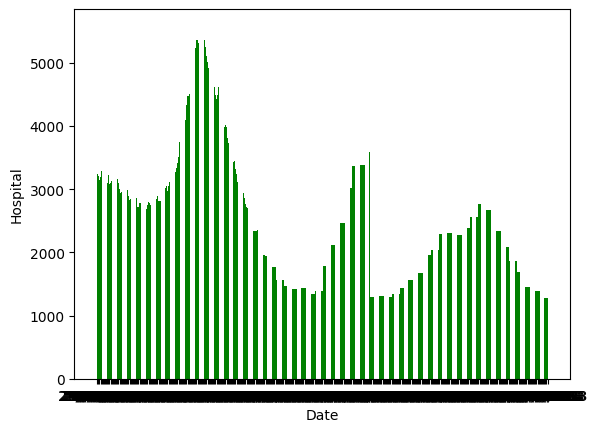

In [148]:
show_bar_plot(merged_df, 'Date', 'Hospital')

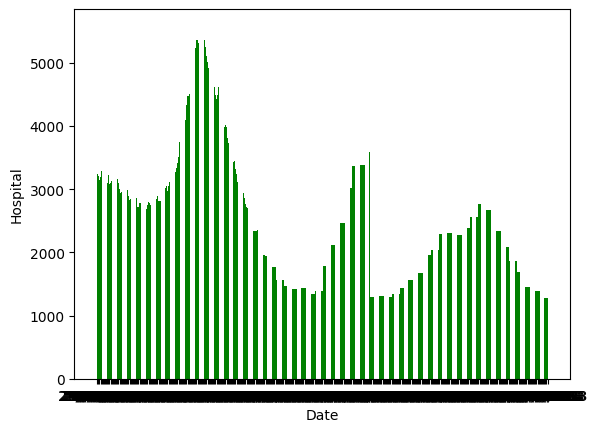

In [155]:
show_bar_plot(merged_df, 'Date', 'Hospital')

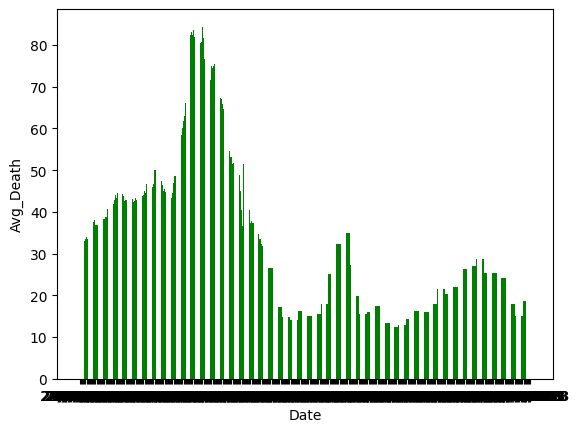

In [156]:
show_bar_plot(merged_df, 'Date', 'Avg_Death')